In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
appointments_df = pd.read_csv('Med/appointments.csv')
patients_df = pd.read_csv('Med/patients.csv')
slots_df = pd.read_csv('Med/slots.csv')

In [3]:
print('appoitnments:', appointments_df.info(),'\n')
print('patients:', patients_df.info(),'\n')
print('appoitnments:', slots_df.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111488 entries, 0 to 111487
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   appointment_id        111488 non-null  int64  
 1   slot_id               111488 non-null  int64  
 2   scheduling_date       111488 non-null  object 
 3   appointment_date      111488 non-null  object 
 4   appointment_time      111488 non-null  object 
 5   scheduling_interval   111488 non-null  int64  
 6   status                111488 non-null  object 
 7   check_in_time         86032 non-null   object 
 8   appointment_duration  86032 non-null   float64
 9   start_time            86032 non-null   object 
 10  end_time              86032 non-null   object 
 11  waiting_time          86032 non-null   float64
 12  patient_id            111488 non-null  int64  
 13  sex                   111488 non-null  object 
 14  age                   111488 non-null  int64  
 15  

In [4]:
# Convert date/time columns to datetime format
appointments_df['scheduling_date'] = pd.to_datetime(appointments_df['scheduling_date'])
appointments_df['appointment_date'] = pd.to_datetime(appointments_df['appointment_date'], errors = 'coerce')
appointments_df['check_in_time'] = pd.to_datetime(appointments_df['check_in_time'], format='%H:%M:%S').dt.time
appointments_df['start_time'] = pd.to_datetime(appointments_df['start_time'], format='%H:%M:%S').dt.time
appointments_df['end_time'] = pd.to_datetime(appointments_df['end_time'], format='%H:%M:%S').dt.time


patients_df['dob'] = pd.to_datetime(patients_df['dob'], errors='coerce')

slots_df['appointment_date'] = pd.to_datetime(slots_df['appointment_date'])
slots_df['appointment_time'] = pd.to_datetime(slots_df['appointment_time'], format='%H:%M:%S', errors = 'coerce').dt.hour

#  Fill empty values
appointments_df['check_in_time'] = appointments_df['check_in_time'].fillna('00:00:00')
appointments_df['appointment_duration'] = appointments_df['appointment_duration'].fillna(0)
appointments_df['start_time'] = appointments_df['start_time'].fillna('00:00:00') 
appointments_df['end_time'] = appointments_df['end_time'].fillna('00:00:00')
appointments_df['waiting_time'] = appointments_df['waiting_time'].fillna(0.0)


In [5]:
# Adding new feature appointment_days and Time_of_day

appointments_df['appointment_days'] = appointments_df['appointment_date'].dt.day_name()
appointments_df['Time_of_day'] = pd.to_datetime(appointments_df["appointment_time"]).dt.hour.apply(lambda x: 'AM' if x < 12 else 'PM' )

print(appointments_df['appointment_days'].unique())

['Thursday' 'Friday' 'Monday' 'Tuesday' 'Wednesday']


C:\Users\nikhi\AppData\Local\Temp\ipykernel_22516\1732613712.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  appointments_df['Time_of_day'] = pd.to_datetime(appointments_df["appointment_time"]).dt.hour.apply(lambda x: 'AM' if x < 12 else 'PM' )


In [6]:
merged_df =  pd.merge(appointments_df, patients_df[['patient_id', 'insurance']], on = 'patient_id' , how = 'inner')
final_df = pd.merge(merged_df, slots_df[['slot_id', 'is_available']], on = ['slot_id'] , how = 'inner')


In [7]:
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111488 entries, 0 to 111487
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   appointment_id        111488 non-null  int64         
 1   slot_id               111488 non-null  int64         
 2   scheduling_date       111488 non-null  datetime64[ns]
 3   appointment_date      111488 non-null  datetime64[ns]
 4   appointment_time      111488 non-null  object        
 5   scheduling_interval   111488 non-null  int64         
 6   status                111488 non-null  object        
 7   check_in_time         111488 non-null  object        
 8   appointment_duration  111488 non-null  float64       
 9   start_time            111488 non-null  object        
 10  end_time              111488 non-null  object        
 11  waiting_time          111488 non-null  float64       
 12  patient_id            111488 non-null  int64         
 13 

In [8]:
final_df 

,appointment_id,slot_id,scheduling_date,appointment_date,appointment_time,scheduling_interval,status,check_in_time,appointment_duration,start_time,end_time,waiting_time,patient_id,sex,age,age_group,appointment_days,Time_of_day,insurance,is_available
0,138,1,2014-12-28,2015-01-01,08:00:00,4,did not attend,00:00:00,0.0,00:00:00,00:00:00,0.0,8285,Male,37,35-39,Thursday,AM,MediSpectra Flux,False
1,146,23,2014-12-29,2015-01-01,13:30:00,3,did not attend,00:00:00,0.0,00:00:00,00:00:00,0.0,5972,Male,84,80-84,Thursday,PM,CurativeWhale,False
2,21,24,2014-12-17,2015-01-01,13:45:00,15,attended,13:36:45,5.2,13:37:57,13:43:09,1.2,6472,Male,77,75-79,Thursday,PM,Vitalynx Orbit,False
3,233,25,2014-12-31,2015-01-01,14:00:00,1,attended,13:59:32,28.9,14:00:40,14:29:34,1.1,5376,Female,37,35-39,Thursday,PM,Heliospring Vital,False
4,90,26,2014-12-26,2015-01-01,14:15:00,6,cancelled,00:00:00,0.0,00:00:00,00:00:00,0.0,8028,Male,72,70-74,Thursday,PM,HealthZenotron,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111483,111378,104015,2024-12-01,2024-12-19,11:30:00,18,scheduled,00:00:00,0.0,00:00:00,00:00:00,0.0,10587,Female,36,35-39,Thursday,AM,HealthZenotron,False
111484,111379,104053,2024-12-01,2024-12-20,11:00:00,19,scheduled,00:00:00,0.0,00:00:00,00:00:00,0.0,36138,Male,34,30-34,Friday,AM,Vitalynx Orbit,False
111485,111380,104068,2024-12-01,2024-12-20,14:45:00,19,scheduled,00:00:00,0.0,00:00:00,00:00:00,0.0,1716,Female,97,90+,Friday,PM,HealthZenotron,False
111486,111428,104100,2024-12-01,2024-12-23,12:45:00,22,scheduled,00:00:00,0.0,00:00:00,00:00:00,0.0,30412,Male,87,85-89,Monday,PM,QuantumPetal,False


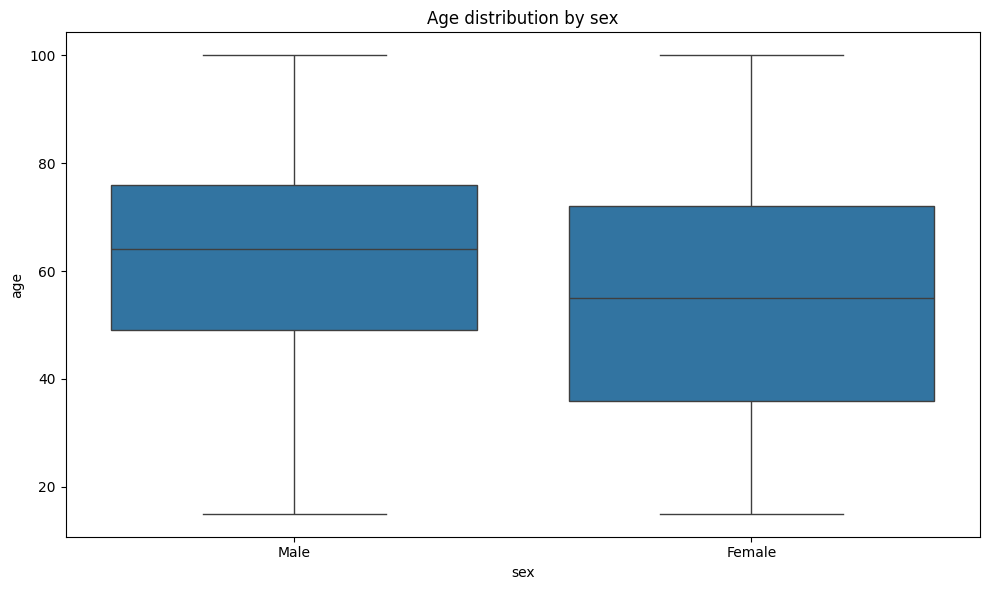

In [9]:
plt.figure(figsize= (10,6))
sns.boxplot(data = final_df, x = 'sex', y='age')
plt.title("Age distribution by sex")
plt.xlabel("sex")
plt.ylabel("age")
plt.tight_layout()
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_22516\3099773272.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f"{abs(int(tick))}%" for tick in ticks])


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

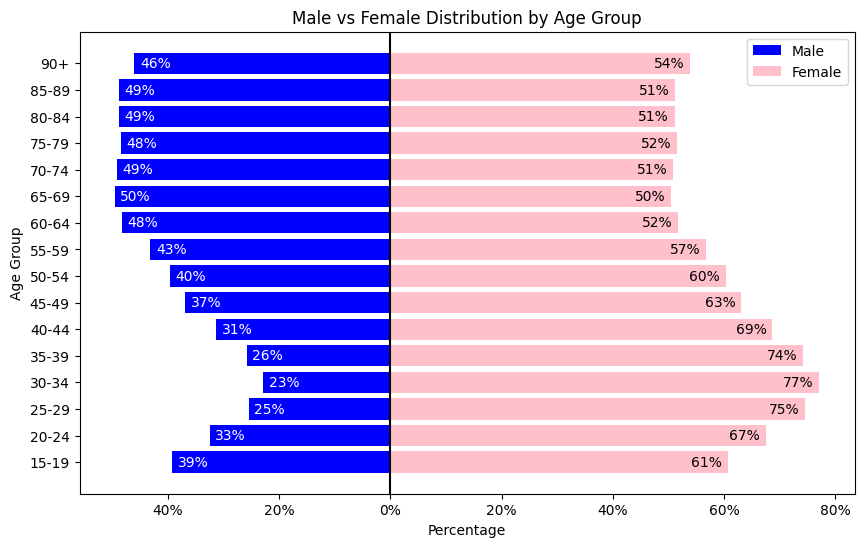

In [28]:
age_sex = merged_df.groupby(['age_group', 'sex']).size().unstack()
age_sex_percent = age_sex.div(age_sex.sum(axis=1), axis = 0)*100

age_sex_percent['Male'] = -age_sex_percent['Male']

plt.figure(figsize=(10, 6))
plt.barh(age_sex_percent.index, age_sex_percent['Male'], color='blue', label = "Male")
plt.barh(age_sex_percent.index, age_sex_percent['Female'], color='pink', label = "Female")


plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('Male vs Female Distribution by Age Group')
plt.legend(loc='upper right')
plt.axvline(0, color='black')
ticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([f"{abs(int(tick))}%" for tick in ticks])
for i in range(len(age_sex_percent)):
    age_group = age_sex_percent.index[i]
    male_val = age_sex_percent["Male"].iloc[i]
    female_val = age_sex_percent["Female"].iloc[i]

    plt.text(male_val + 1, i , f"{(male_val * -1):.0f}%", va='center' , color='white')
    plt.text(female_val - 1, i, f"{female_val:.0f}%", va='center', color='black', ha='right')  
plt.tight_layout

* From age 15 to 59 the percentage of female patients tends to be more than the male 
* Ages 60 to 90 has equal spread of male to female ration of approx 50-50 
* Age 25 - 44 are more likely(~73%) to be female patients 



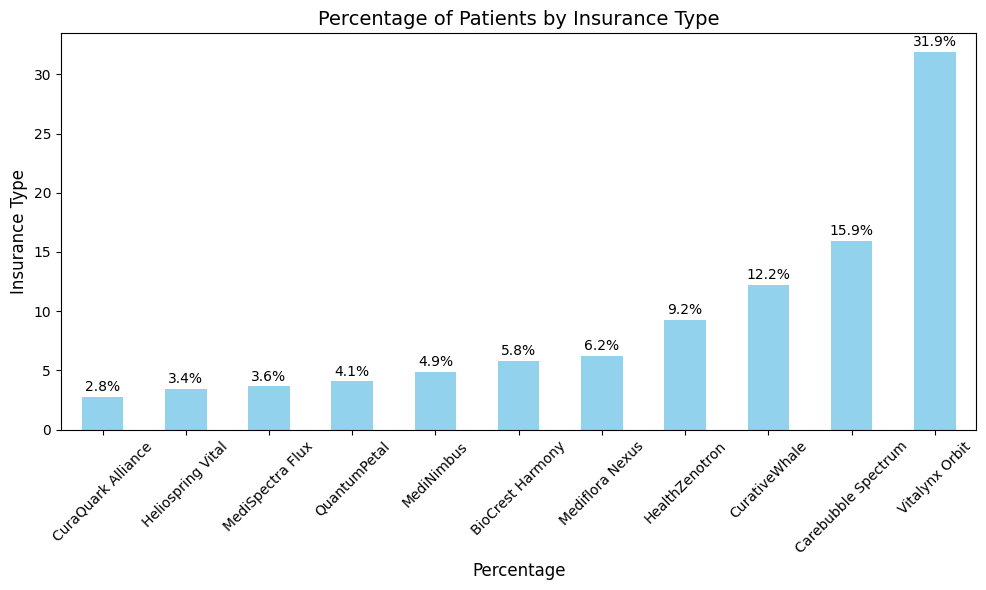

In [64]:
insurance_percent= merged_df['insurance'].value_counts(normalize=True)*100
plt.figure(figsize=(10,6))
insurance_percent.sort_values().plot(kind='bar', color='skyblue', alpha=0.9)
plt.title('Percentage of Patients by Insurance Type', fontsize=14)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Insurance Type', fontsize=12)
plt.xticks(rotation = 45)

for i, value in enumerate(insurance_percent.sort_values()):
    plt.text(i,value + 00.5,f"{value:.1f}%", ha="center" )
plt.tight_layout()
plt.show()